# Project 7: Chapter 6: Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [3]:
#!pip install pandas-datareader
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime  

mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)
(start, end, symbols)

(datetime.datetime(1980, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 ['AGTHX',
  'FCNTX',
  'CWMAX',
  'CWMCX',
  'CWMEX',
  'CWMFX',
  'AIVSX',
  'AWSHX',
  'ANCFX',
  'AMCFX',
  'CAFAX',
  'CAFCX',
  'CAFEX',
  'CAFFX',
  'FMACX',
  'TRBCX',
  'AFMFX',
  'AMRFX',
  'CMLAX',
  'CMLCX',
  'CMLEX',
  'CMLFX',
  'FDGRX',
  'FBGRX',
  'AMCPX',
  'EAGRX',
  'AMRMX',
  'FMAGX',
  'HACAX',
  'FLPSX',
  'PRGFX',
  'PRNHX',
  'DFQTX',
  'DFEOX',
  'FLPKX',
  'RPMGX',
  'FOCPX',
  'CNGAX',
  'CNGCX',
  'CNGEX',
  'CNGFX',
  'FNEFX',
  'FOCKX',
  'DFLVX',
  'CDDRX',
  'CDDYX',
  'CDIRX',
  'CVIRX',
  'TWCUX',
  'EGFFX',
  'EGFIX',
  'ANEFX',
  'HLIEX',
  'FRDPX',
  'FRDAX',
  'FRDRX',
  'FRISX',
  'PRHSX',
  'PRILX',
  'DDFIX',
  'DDFRX',
  'VAFAX',
  'PCBIX',
  'FCGAX',
  'FGSRX',
  'FIFRX',
  'PRFDX',
  'PRBLX',
  'JVMIX',
  'VWNFX',
  'FKGRX',
  'PRDGX',
  'AULDX',
  'AULGX',
  'AULNX',
  'AULRX',
  'AULYX',
  'AKRSX',
  'MFEIX',
  'POLIX',
  'FKDNX',
  'MADVX',
  'VWUSX',
  'LSGRX',


In [4]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end) 
fund_data

[*********************100%%**********************]  100 of 100 completed

1 Failed download:
['EAGRX']: Exception("%ticker%: Data doesn't exist for startDate = 315550800, endDate = 1577854800")


Price       Adj Close                                                         \
Ticker          AFMFX      AGTHX      AIVSX      AKRIX      AKRSX      AMCFX   
Date                                                                           
1980-01-02        NaN   0.599009        NaN        NaN        NaN        NaN   
1980-01-03        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-04        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-07        NaN   0.625129        NaN        NaN        NaN        NaN   
1980-01-08        NaN   0.632094        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  36.736088  40.456989  32.380341  39.849663  40.053391  27.291407   
2019-12-26  36.820656  40.662514  32.519527  39.963570  40.167400  27.380096   
2019-12-27  36.846031  40.654610  32.519527  40.016140  40.220020  27.372036   
2019-12-30  36.702267  40.298889  32.298473  39.875950  40.070927  27.194656   
2019-12-31  36.786835  40.417465  32.396721  39.963570  40.167400  27.259159   

Price                                                   ... Volume        \
Ticker          AMCPX      AMRFX      AMRMX      ANCFX  ...  PRNHX RPMGX   
Date                                                    ...                
1980-01-02        NaN        NaN        NaN   0.683941  ...      0   NaN   
1980-01-03        NaN        NaN        NaN   0.680125  ...      0   NaN   
1980-01-04        NaN        NaN        NaN   0.690617  ...      0   NaN   
1980-01-07        NaN        NaN        NaN   0.693480  ...      0   NaN   
1980-01-08        NaN        NaN        NaN   0.710649  ...      0   NaN   
...               ...        ...        ...        ...  ...    ...   ...   
2019-12-24  27.186577  36.895550  37.228840  48.387196  ...      0   0.0   
2019-12-26  27.275549  36.980480  37.314503  48.605892  ...      0   0.0   
2019-12-27  27.259377  37.005966  37.340199  48.652756  ...      0   0.0   
2019-12-30  27.081415  36.861572  37.194565  48.316902  ...      0   0.0   
2019-12-31  27.154219  36.946507  37.280243  48.441868  ...      0   0.0   

Price                                                       
Ticker     SBLYX SEEGX TRBCX TWCGX TWCUX VAFAX VWNFX VWUSX  
Date                                                        
1980-01-02   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-03   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-04   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-07   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-08   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2019-12-24   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-26   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-27   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-30   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-31   0.0   0.0   0.0     0   0.0   0.0   0.0     0  

[10087 rows x 600 columns]

In [5]:
# removes any column with NA application

close_data=fund_data["Adj Close"].dropna(how ="all", axis=1)
close_data

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.599009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683941,...,0.599536,NaN,NaN,NaN,NaN,0.328262,NaN,NaN,NaN,1.497637
1980-01-03,NaN,0.609457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680125,...,0.588704,NaN,NaN,NaN,NaN,0.320711,NaN,NaN,NaN,1.497637
1980-01-04,NaN,0.609457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690617,...,0.595769,NaN,NaN,NaN,NaN,0.285476,NaN,NaN,NaN,1.497637
1980-01-07,NaN,0.625129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693480,...,0.580032,NaN,NaN,NaN,NaN,0.290510,NaN,NaN,NaN,1.497637
1980-01-08,NaN,0.632094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710649,...,0.586269,NaN,NaN,NaN,NaN,0.297341,NaN,NaN,NaN,1.497637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,36.736088,40.456989,32.380341,39.849663,40.053391,27.291407,27.186577,36.895550,37.228840,48.387196,...,42.597168,75.295700,38.965019,32.529133,102.683052,28.506140,41.435978,14.698990,27.681656,36.163040
2019-12-26,36.820656,40.662514,32.519527,39.963570,40.167400,27.380096,27.275549,36.980480,37.314503,48.605892,...,42.654209,75.366707,39.279427,32.744984,103.558846,28.757088,41.826435,14.812883,27.788214,36.432034
2019-12-27,36.846031,40.654610,32.519527,40.016140,40.220020,27.372036,27.259377,37.005966,37.340199,48.652756,...,42.504475,75.287804,39.257988,32.721001,103.624947,28.741411,41.802525,14.819583,27.788214,36.398407


In [6]:
close_data["S&P 500"] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [7]:
close_data["S&P 500"].tail()

Date
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: S&P 500, dtype: float64

In [8]:
close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,36.736088,40.456989,32.380341,39.849663,40.053391,27.291407,27.186577,36.895550,37.228840,48.387196,...,75.295700,38.965019,32.529133,102.683052,28.506140,41.435978,14.698990,27.681656,36.163040,3223.379883
2019-12-26,36.820656,40.662514,32.519527,39.963570,40.167400,27.380096,27.275549,36.980480,37.314503,48.605892,...,75.366707,39.279427,32.744984,103.558846,28.757088,41.826435,14.812883,27.788214,36.432034,3239.909912
2019-12-27,36.846031,40.654610,32.519527,40.016140,40.220020,27.372036,27.259377,37.005966,37.340199,48.652756,...,75.287804,39.257988,32.721001,103.624947,28.741411,41.802525,14.819583,27.788214,36.398407,3240.020020
2019-12-30,36.702267,40.298889,32.298473,39.875950,40.070927,27.194656,27.081415,36.861572,37.194565,48.316902,...,75.003754,38.929291,32.409218,102.666527,28.513983,41.459881,14.698990,27.643600,36.045353,3221.290039
2019-12-31,36.786835,40.417465,32.396721,39.963570,40.167400,27.259159,27.154219,36.946507,37.280243,48.441868,...,75.216789,39.022182,32.481167,102.740875,28.568878,41.563473,14.732487,27.712101,36.163040,3230.780029


In [9]:
rolling4wk=np.log(close_data).diff(20)
rolling4wk.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,0.024164,0.034020,0.034135,0.007483,0.007672,0.038170,0.037893,0.023893,0.023820,0.030728,...,0.024472,0.028295,0.035356,0.026003,0.027354,0.031897,0.038054,0.022869,0.031784,0.028235
2019-12-26,0.024414,0.038144,0.038425,0.007330,0.007518,0.039655,0.039387,0.024371,0.024069,0.035553,...,0.021245,0.034175,0.037708,0.031702,0.032913,0.036720,0.042681,0.028776,0.034366,0.031157
2019-12-27,0.023058,0.032500,0.033954,0.007144,0.007333,0.034100,0.033784,0.023015,0.022713,0.032427,...,0.015743,0.027543,0.031396,0.026287,0.027578,0.029728,0.036103,0.025680,0.027267,0.027025
2019-12-30,0.022104,0.027655,0.031853,0.006638,0.006611,0.031688,0.031358,0.021833,0.021760,0.030220,...,0.017941,0.022531,0.026507,0.021000,0.023357,0.024891,0.031442,0.025369,0.021633,0.025247
2019-12-31,0.031258,0.040805,0.042890,0.020284,0.020422,0.044057,0.043830,0.031216,0.031143,0.041354,...,0.028736,0.036440,0.042685,0.034496,0.036804,0.038019,0.045207,0.036162,0.039188,0.036857


<Axes: xlabel='Date'>

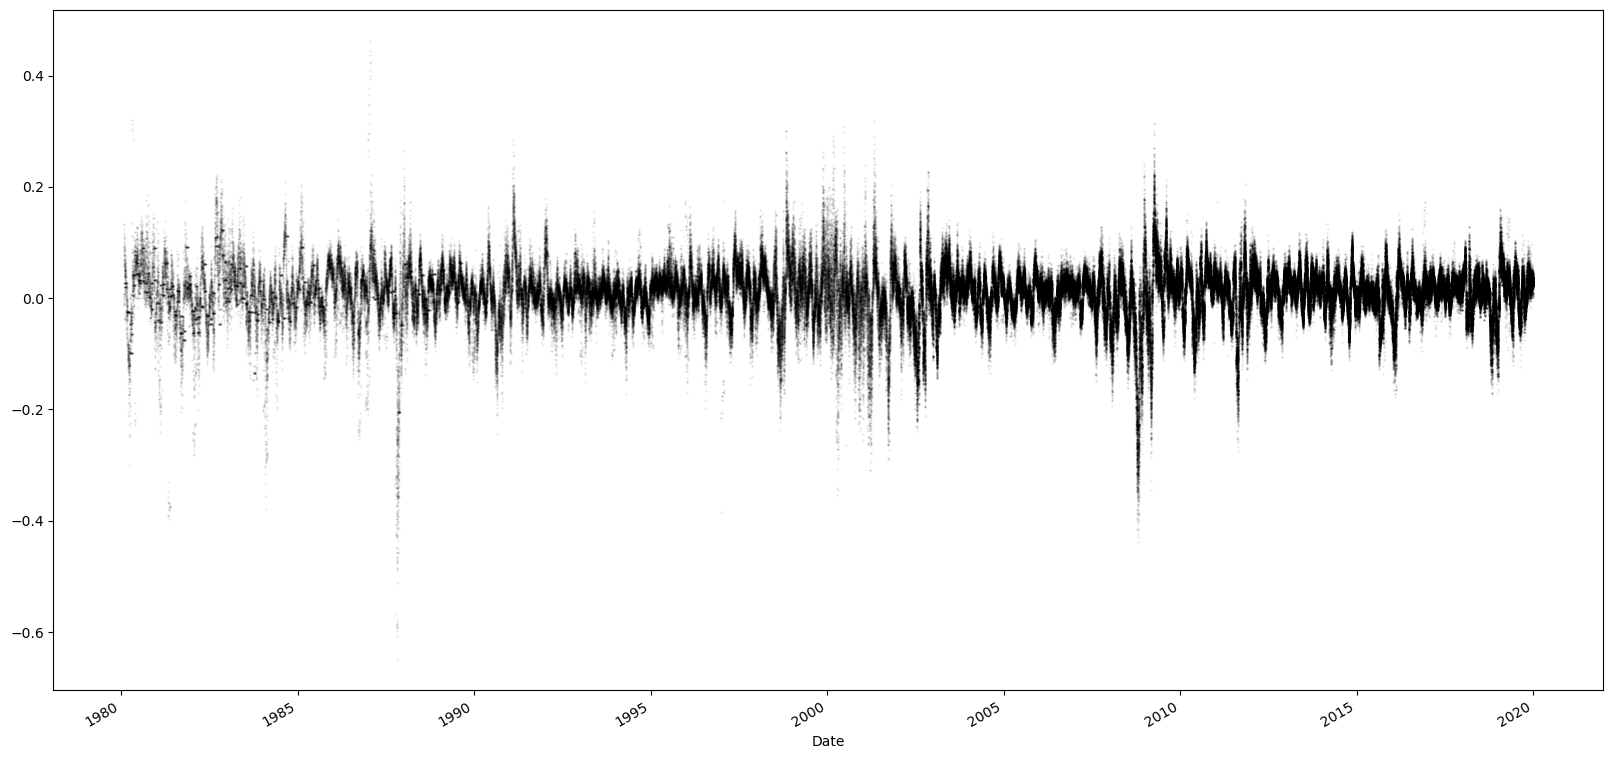

In [10]:
fig, ax=plt.subplots(figsize=(20,10))
rolling4wk.plot.line(ls="", marker=".", ax=ax, color="k", markersize=1, alpha=.1, legend= False)
rolling4wk["S&P 500"].plot.line(ls="", marker="", color="Red", alpha=.1, legend= False)

In [11]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,33.871075,36.979721,29.554483,38.182529,38.358761,24.858326,24.781277,34.036896,34.372864,43.642986,...,71.281807,36.324135,30.439293,96.351395,26.170855,37.630035,13.367851,25.018570,33.481197,2953.560059
2019-09-30,33.927963,36.072563,29.034613,38.999451,39.176540,24.341728,24.262259,34.085884,34.422337,42.655285,...,69.934196,35.322327,30.333427,94.342873,25.673563,36.660069,13.186357,24.397642,32.819004,2906.270020
2019-10-31,34.371723,35.932434,29.205877,38.403778,38.588764,24.218363,24.138311,34.530266,34.861317,43.182728,...,69.312782,35.451813,29.310078,92.877640,25.643877,36.851013,13.086222,24.955782,32.390999,2940.250000
2019-11-30,35.188938,37.820507,30.358849,39.246223,39.432095,25.374926,25.284805,35.351242,35.681477,45.444611,...,71.581276,36.855709,30.008781,96.573647,26.772060,38.829124,13.774642,26.295311,33.820370,3066.909912
2019-12-31,35.654747,38.801426,31.036600,39.161129,39.355427,26.084282,25.989744,35.810986,36.137127,46.479458,...,73.086136,37.625809,31.123871,99.257164,27.536545,40.012939,14.081304,26.727875,34.773285,3113.870117


In [12]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005741,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021169,0.021095,-0.021001,-0.021166,0.001438,0.001438,-0.022891,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019185,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023498,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052287,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013151,0.025606,0.022079,-0.002171,-0.001946,0.027571,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022019,0.016316,0.027786,0.015196


In [13]:
avg_monthly_return = monthly_close_data.loc["2012":].dropna(axis = 1)
avg_monthly_return


Ticker,AGTHX,AIVSX,AKRIX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,ANEFX,AULRX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,13.027385,12.215584,10.653035,9.240747,9.330377,14.596842,14.922678,17.211061,12.587382,11.555238,...,23.633177,10.831982,9.818519,28.098614,9.349732,12.434604,4.918589,10.959603,9.731457,1277.060059
2012-02-29,13.796315,12.654550,10.976572,9.775817,9.871761,14.943857,15.277302,17.912483,13.576872,12.135826,...,25.305378,11.346159,10.360730,29.663214,9.931275,13.063801,5.238990,11.323529,10.331377,1324.089966
2012-03-31,14.396348,13.142282,11.631536,10.108426,10.203424,15.307664,15.643368,18.609127,14.160152,12.767793,...,26.252663,11.923994,10.957163,31.520742,10.404016,13.751650,5.542072,11.792035,11.090570,1374.089966
2012-04-30,14.747478,13.457788,12.010312,10.330163,10.422901,15.627770,15.961270,19.003361,14.535117,13.235346,...,26.790791,12.256987,11.449668,33.063915,10.779204,14.263535,5.745570,12.197788,11.446273,1419.040039
2012-05-31,14.667473,13.390991,12.128677,10.315703,10.408271,15.689717,16.024542,18.864553,14.446584,13.014416,...,26.692951,12.159045,11.418038,32.971043,10.696663,14.028919,5.607019,12.084847,11.308242,1405.819946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,36.979721,29.554483,38.182529,24.858326,24.781277,34.036896,34.372864,43.642986,36.842484,33.661953,...,71.281807,36.324135,30.439293,96.351395,26.170855,37.630035,13.367851,25.018570,33.481197,2953.560059
2019-09-30,36.072563,29.034613,38.999451,24.341728,24.262259,34.085884,34.422337,42.655285,35.879543,32.780590,...,69.934196,35.322327,30.333427,94.342873,25.673563,36.660069,13.186357,24.397642,32.819004,2906.270020
2019-10-31,35.932434,29.205877,38.403778,24.218363,24.138311,34.530266,34.861317,43.182728,35.669159,32.936127,...,69.312782,35.451813,29.310078,92.877640,25.643877,36.851013,13.086222,24.955782,32.390999,2940.250000


In [14]:
num_months = avg_monthly_return.shape[0]
avg_monthly_return = avg_monthly_return.iloc[-1].div(avg_monthly_return.iloc[0])
avg_monthly_return = avg_monthly_return.pow(1 / num_months).sub(1)
avg_monthly_return.describe()

count    83.000000
mean      0.011145
std       0.001661
min       0.007952
25%       0.009773
50%       0.010937
75%       0.012503
max       0.015270
dtype: float64

<Axes: xlabel='Date'>

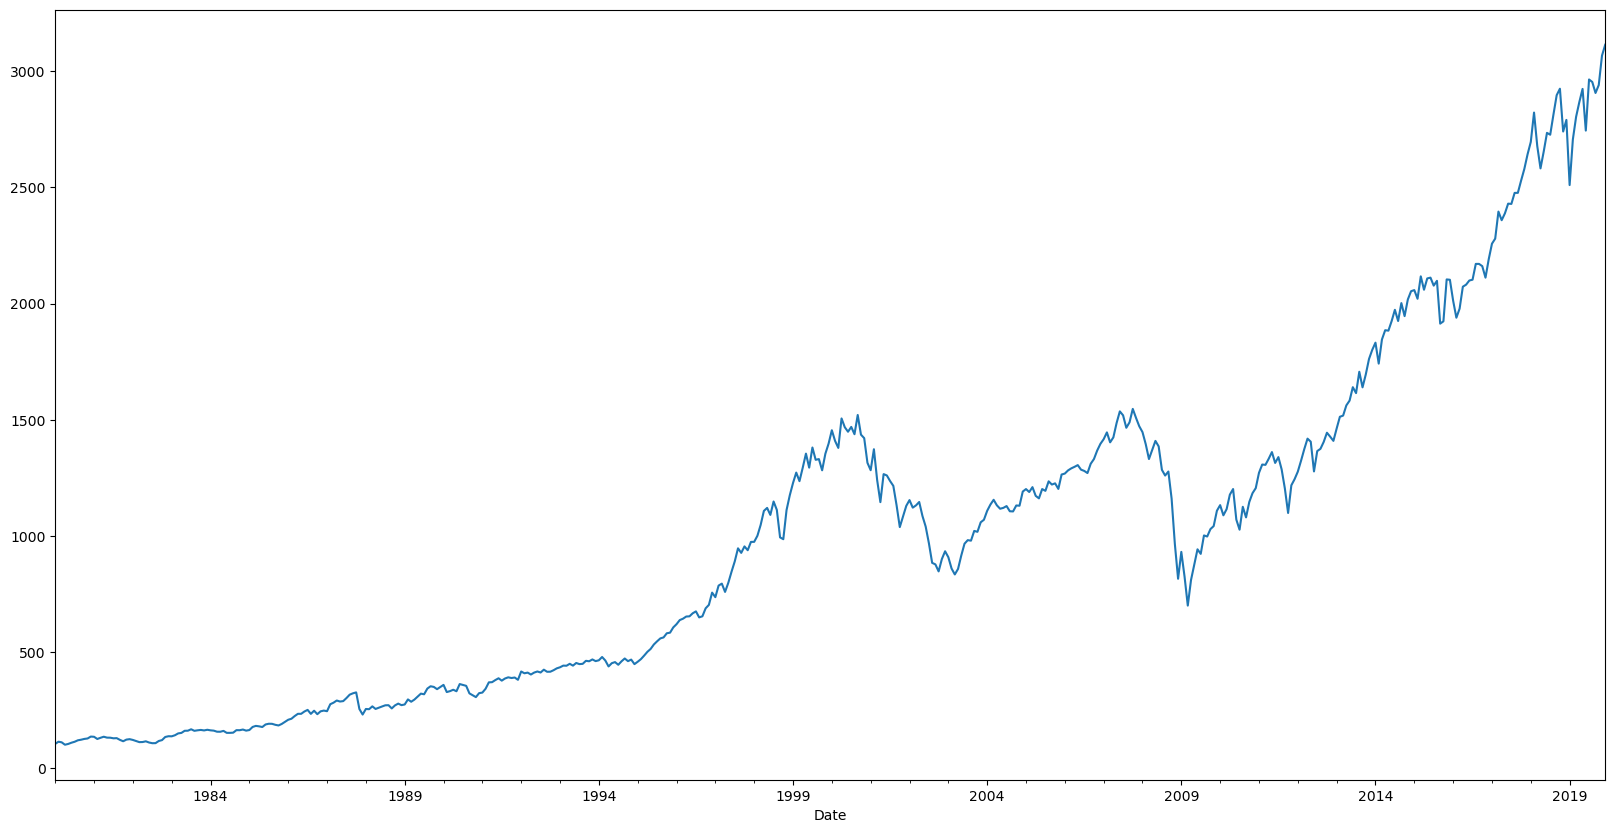

In [15]:
fig, ax = plt.subplots(figsize = (20,10))
monthly_close_data["S&P 500"].plot.line(ax = ax)

In [16]:
# Finding the average of the averages
n = monthly_returns.notna().sum().sum()
np.sqrt(n)

158.8332458901473

In [17]:
mu=monthly_returns.mean()
mu

Ticker
AFMFX      0.008467
AGTHX      0.008708
AIVSX      0.007065
AKRIX      0.012940
AKRSX      0.014000
             ...   
TWCUX      0.009303
VAFAX      0.007559
VWNFX      0.008301
VWUSX      0.006566
S&P 500    0.007061
Length: 100, dtype: float64

In [18]:
sigma=monthly_returns.std()
sigma

Ticker
AFMFX      0.028239
AGTHX      0.048214
AIVSX      0.040004
AKRIX      0.033775
AKRSX      0.033410
             ...   
TWCUX      0.060746
VAFAX      0.048225
VWNFX      0.043712
VWUSX      0.058541
S&P 500    0.044310
Length: 100, dtype: float64

In [19]:
# sigma/np.sqrt(monthly_returns.shape[0])

In [20]:
monthly_returns.sem

<bound method NDFrame._add_numeric_operations.<locals>.sem of Ticker         AFMFX     AGTHX     AIVSX     AKRIX     AKRSX     AMCFX  \
Date                                                                     
1980-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1980-02-29       NaN  0.110001       NaN       NaN       NaN       NaN   
1980-03-31       NaN -0.021053       NaN       NaN       NaN       NaN   
1980-04-30       NaN -0.130497       NaN       NaN       NaN       NaN   
1980-05-31       NaN  0.015038       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-08-31 -0.005503 -0.012487 -0.008626  0.016176  0.016344 -0.015695   
2019-09-30  0.001678 -0.024837 -0.017747  0.021169  0.021095 -0.021001   
2019-10-31  0.012995 -0.003892  0.005881 -0.015392 -0.015117 -0.005081   
2019-11-30  0.023498  0.051211  0.038718  0.021699  0.021619  0.046650   
2019-12-31  0.013151  0.025606  0.022079 -0.002171

In [21]:
monthly_returns.sem()

Ticker
AFMFX      0.004773
AGTHX      0.002203
AIVSX      0.001983
AKRIX      0.003033
AKRSX      0.004678
             ...   
TWCUX      0.002838
VAFAX      0.003656
VWNFX      0.002148
VWUSX      0.002675
S&P 500    0.002025
Length: 100, dtype: float64

In [22]:
monthly_returns.mean()/monthly_returns.sem()

Ticker
AFMFX      1.773801
AGTHX      3.952655
AIVSX      3.563148
AKRIX      4.266224
AKRSX      2.992460
             ...   
TWCUX      3.277384
VAFAX      2.067630
VWNFX      3.863778
VWUSX      2.454633
S&P 500    3.487915
Length: 100, dtype: float64

In [23]:
t_stats=monthly_returns.mean()/monthly_returns.sem()
t_stats.plot.hist(bins=30, ax=ax, density=True, alpha=.5, legend=False)

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

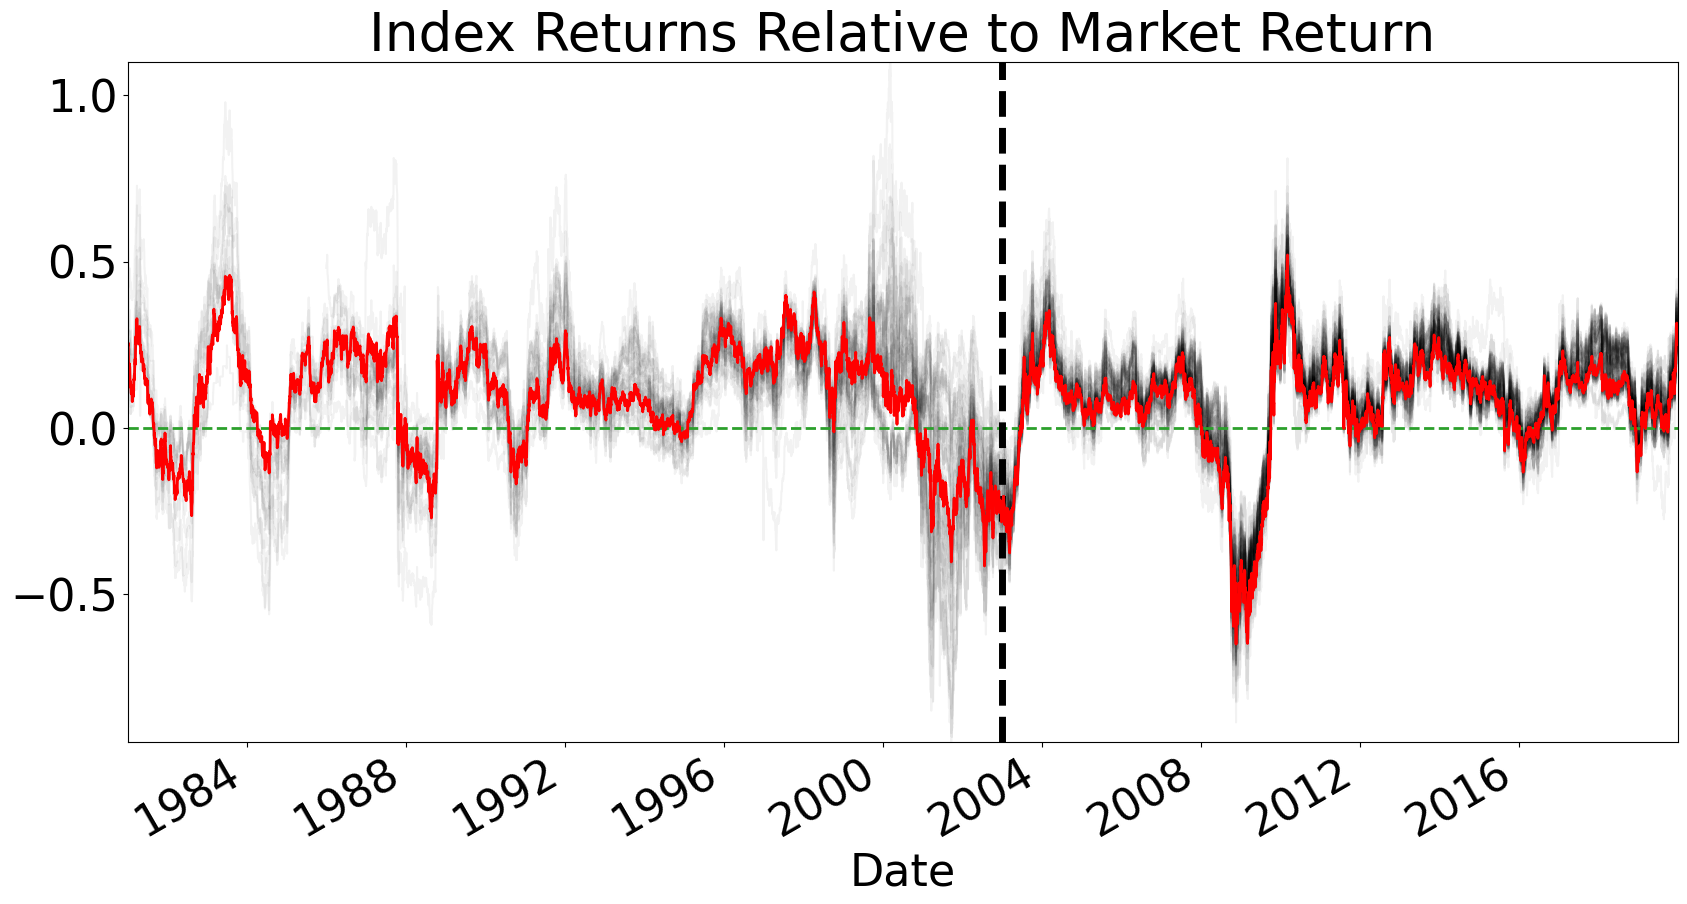

In [24]:
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.rcParams.update({'font.size': 32})
days_per_year = 251 #yearly returns
yoy_return = np.log(close_data).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)
yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
ax.set_title("Index Returns Relative to Market Return")

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

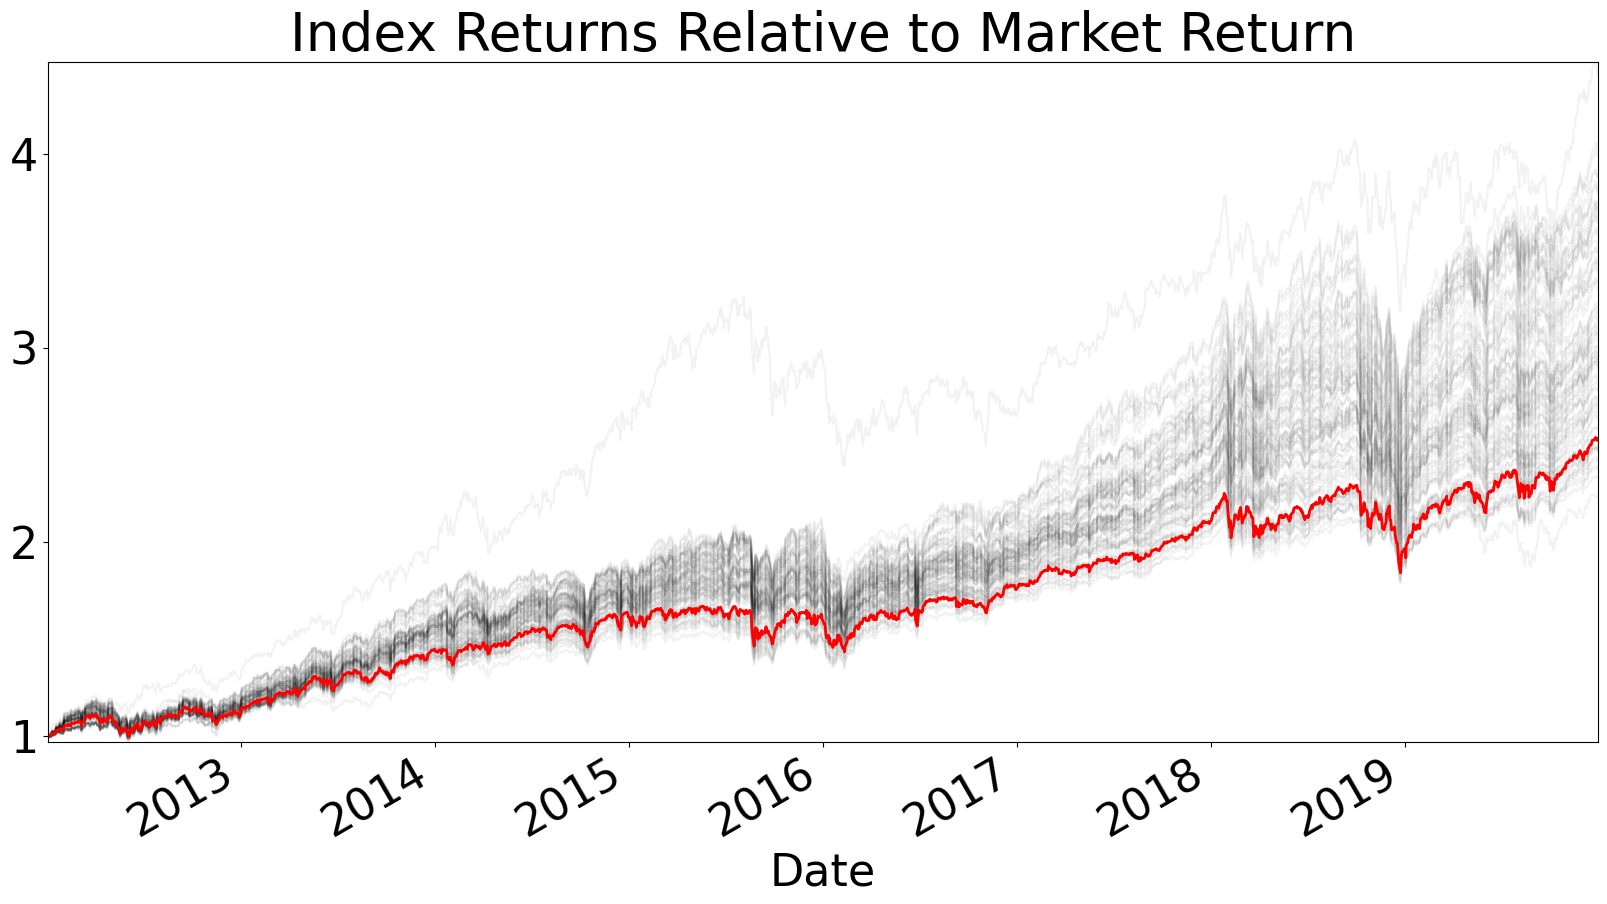

In [25]:
norm_data = close_data.loc["2012":].div(close_data.loc["01-03-2012"]).dropna(axis=1)
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
ax.set_title("Index Returns Relative to Market Return")

###  Hypothesis Test

### One Sample T-test

$$t=\frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$$

$H_0: \bar{X} = \mu$

$H_a: \bar{X} \ne \mu$


$\mu=0$

In [28]:
means = monthly_returns.mean()
ses = monthly_returns.sem()
means, ses

(Ticker
 AFMFX      0.008467
 AGTHX      0.008708
 AIVSX      0.007065
 AKRIX      0.012940
 AKRSX      0.014000
              ...   
 TWCUX      0.009303
 VAFAX      0.007559
 VWNFX      0.008301
 VWUSX      0.006566
 S&P 500    0.007061
 Length: 100, dtype: float64,
 Ticker
 AFMFX      0.004773
 AGTHX      0.002203
 AIVSX      0.001983
 AKRIX      0.003033
 AKRSX      0.004678
              ...   
 TWCUX      0.002838
 VAFAX      0.003656
 VWNFX      0.002148
 VWUSX      0.002675
 S&P 500    0.002025
 Length: 100, dtype: float64)

Text(0.5, 0, 't-values')

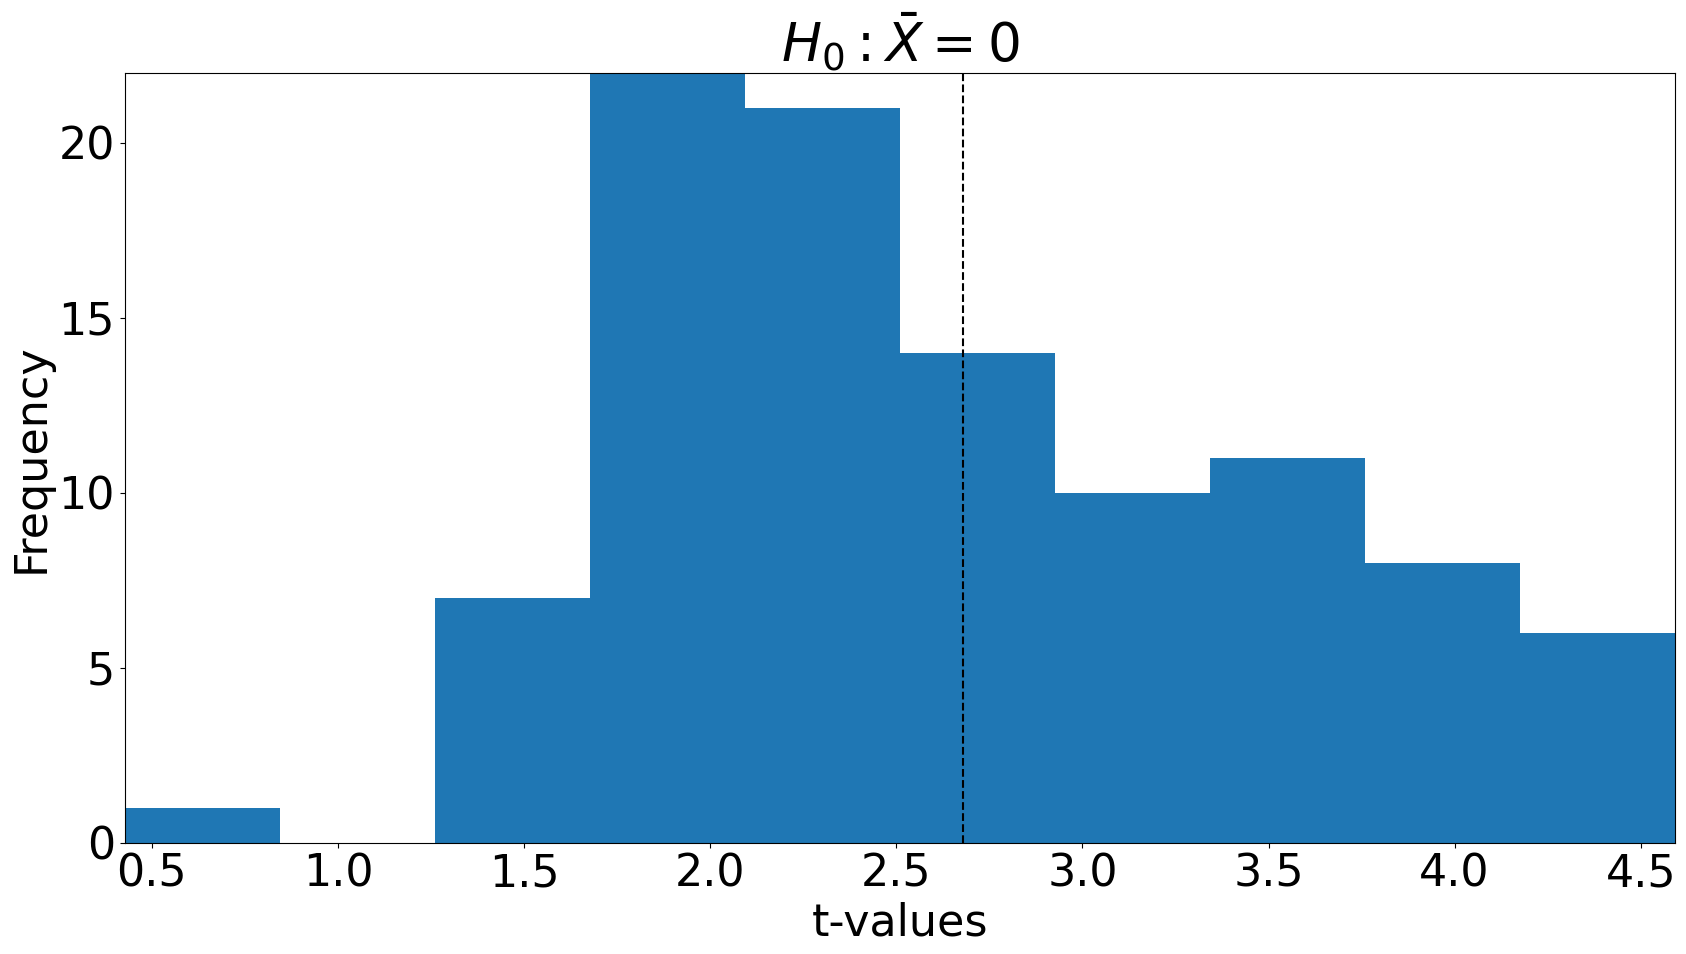

In [58]:
one_sample_test = means.div(ses)
fig, ax = plt.subplots(figsize = (20,10))
one_sample_test.plot.hist(ax = ax)
ax.axvline(one_sample_test.mean(), color = "k", ls = "--")
ax.set_title("$H_0: \\bar{X}=0$")
ax.set_xlabel("t-values")

### Two Sample T-test

$$t = \frac{(\bar{X_1} - \bar{X_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

In [69]:
# s^2 / n
sn = monthly_returns.var().div(monthly_returns.shape[0])
two_sample_test = means.sub(means["S&P 500"]).div(sn.add(sn["S&P 500"]).pow(.5))
two_sample_test

Ticker
AFMFX      0.585978
AGTHX      0.550749
AIVSX      0.001455
AKRIX      2.311559
AKRSX      2.739205
             ...   
TWCUX      0.653078
VAFAX      0.166478
VWNFX      0.436200
VWUSX     -0.147951
S&P 500    0.000000
Length: 100, dtype: float64

Text(0.5, 0, 't-value')

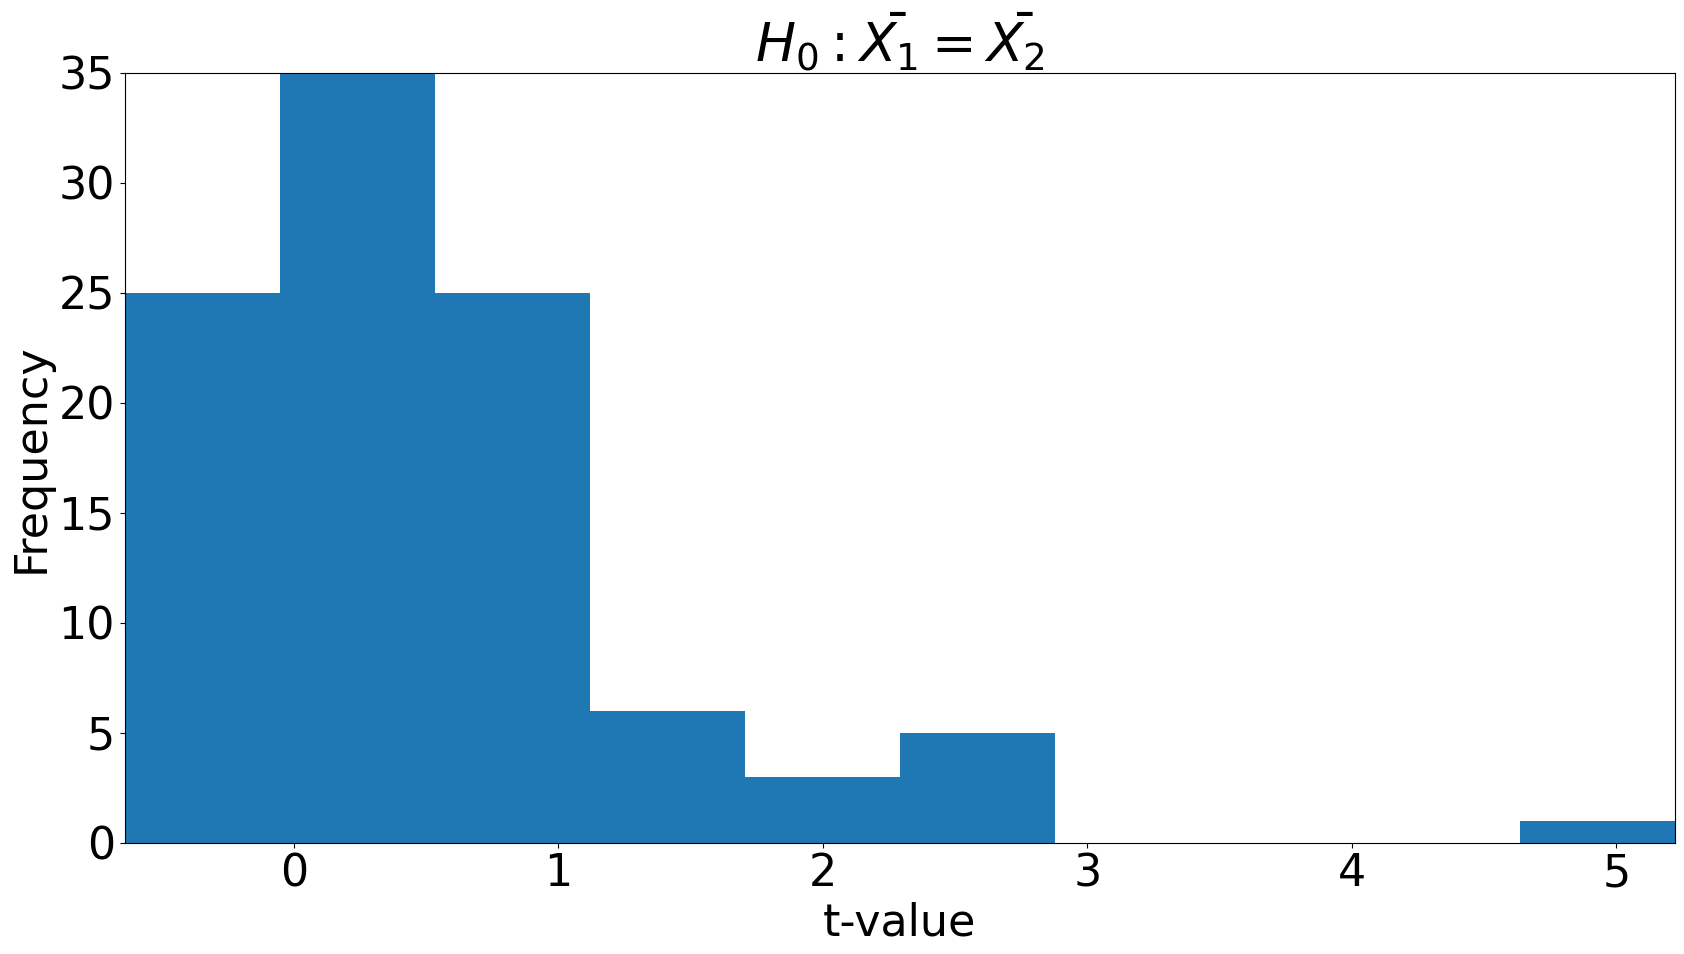

In [71]:
fig, ax = plt.subplots(figsize = (20,10))
two_sample_test.plot.hist(ax = ax)
ax.set_title("$H_0: \\bar{X_1}=\\bar{X_2}$")
ax.set_xlabel("t-value")